In [1]:
import cv2
import dlib
import time
import sys
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import numpy as np


# url = "https://www.youtube.com/watch?v=SIZNf_Ydplg"
epsilon = sys.float_info.epsilon

In [41]:
first_time = time.time()
print("started at = ", time.strftime("%H:%M:%S", time.localtime()))


cap = cv2.VideoCapture(1, cv2.CAP_DSHOW)
# cap = cv2.VideoCapture("own.mp4")
temp_time = time.time()
print("time to start camera = ", temp_time - first_time)


scale_factor = 4
# width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# print("width = ", width, "height = ", height, "scale_factor = ", scale_factor)
width = 1280
height = 720
print("width = ", width, "height = ", height, "scale_factor = ", scale_factor)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, int(width/scale_factor))
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, int(height/scale_factor))
print("time to set camera = ", time.time() - temp_time)
temp_time = time.time()

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("updated width = ", width, "height = ", height)


hog_face_detector = dlib.get_frontal_face_detector()
dlib_facelandmark = dlib.shape_predictor(
    "shape_predictor_68_face_landmarks.dat")
print("time to load dlib = ", time.time() - temp_time)
temp_time = time.time()

i = 0
curr_i = 0
start_time = time.time()
last_time = time.time()
loop_time = time.time()

vis = True

cum_read_frame_time = 0
cum_detect_face_time = 0
cum_feature_time = 0
cum_draw_time = 0


while True:
    # print("\nframe number ", i)
    i = i+1
    curr_i = curr_i+1
    cur_time = time.time()

    _, frame = cap.read()
    _2, frame2 = cap2.read()
    if frame is None:
        break

    # print("time to read frame = ", time.time() - temp_time)
    cum_read_frame_time += time.time() - temp_time
    temp_time = time.time()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = hog_face_detector(gray)
    # print("time to detect faces = ", time.time() - temp_time)
    cum_detect_face_time += time.time() - temp_time
    temp_time = time.time()

    for face in faces:
        rectangle_np = np.array(
            [face.left(), face.top(), face.right(), face.bottom()])
        face_width = face.right() - face.left()
        face_height = face.bottom() - face.top()
        cv2.rectangle(frame, (face.left(), face.top()),
                      (face.right(), face.bottom()), (255, 0, 0), 2)

        face_landmarks = dlib_facelandmark(gray, face)
        # print("time to get features = ", time.time() - temp_time)
        cum_feature_time += time.time() - temp_time
        temp_time = time.time()
        face_landmarks_np = np.array([[p.x, p.y]
                                     for p in face_landmarks.parts()])
        kdtree = cKDTree(face_landmarks_np)
        k = 4

        if vis:
            for n in range(0, 68):
                _, indices = kdtree.query(face_landmarks_np[n], k+1)
                for neighbor_index in indices[1:]:
                    neighbor = face_landmarks_np[neighbor_index]
                    distance = np.linalg.norm(face_landmarks_np[n] - neighbor)
                    if distance < face_width/5:
                        # cv2.line(frame, (face_landmarks_np[n][0], face_landmarks_np[n][1]), (neighbor[0], neighbor[1]), (100, 100, 100), 1)
                        pass
                x = face_landmarks.part(n).x
                y = face_landmarks.part(n).y
                cv2.circle(frame, (x, y), 1, (0, 0, 255), 1)
                # cv2.putText(frame, str(n), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 255, 0), 1)
    # print("time to draw landmarks = ", time.time() - temp_time)
    cum_draw_time += time.time() - temp_time
    temp_time = time.time()
    # print("overall time = ", time.time() - first_time)

    if curr_i % 50 == 0:
        curr_i = 0
        last_time = time.time()
    fps = curr_i/(cur_time - last_time+epsilon)
    cv2.putText(frame, "fps: " + str(fps), (10, 90),cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 255, 255), 1)
    cv2.putText(frame, "Time: " + str(cur_time - start_time),(10, 60), cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 255, 255), 1)
    cv2.putText(frame, "Frame: " + str(i), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 255, 255), 1)
    cv2.putText(frame, str(width) + "x"+str(height), (10, 120),cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 255, 255), 1)
    # frame = cv2.resize(frame, (int(scale_factor*width), int(scale_factor*height)))
    cv2.imshow("Face Landmarks", frame)
    cv2.imshow("Face Landmarks2", frame2)

    key = cv2.waitKey(1)
    if key == 27:
        break

print("\n\ntime precentages: ")
print("read frames = ", round(
    100*cum_read_frame_time/(time.time() - loop_time), 2), "%")
print("detect faces = ", round(
    100*cum_detect_face_time/(time.time() - loop_time), 2), "%")
print("feature from face = ", round(
    100*cum_feature_time/(time.time() - loop_time), 2), "%")
print("draw annotations = ", round(
    100*cum_draw_time/(time.time() - loop_time), 2), "%")
print("total time = ", round(time.time() - loop_time, 2), "sec")
print("overall fps = ", round(i/(cur_time - start_time+epsilon), 2), "fps")
cap.release()
cv2.destroyAllWindows()

started at =  20:48:28
time to start camera =  2.7931370735168457
width =  1280 height =  720 scale_factor =  4
time to set camera =  0.9898061752319336
updated width =  320 height =  176
time to load dlib =  3.1671054363250732


time precentages: 
read frames =  34.34 %
detect faces =  36.27 %
feature from face =  6.98 %
draw annotations =  22.34 %
total time =  4.25 sec
overall fps =  11.98 fps


<class '_dlib_pybind11.points'>
(68, 2)


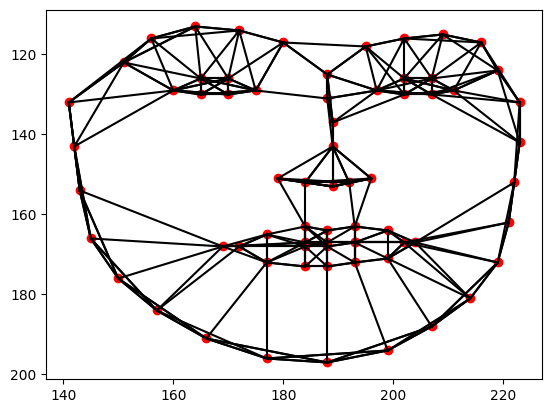

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def connect_closest_points(ax, points, k=5):
    # Build KD-tree for efficient nearest neighbor search
    kdtree = cKDTree(points)

    # Iterate through each point
    for i, point in enumerate(points):
        # Query k+1 neighbors (including the point itself)
        _, indices = kdtree.query(point, k+1)

        # Connect the point with its k closest neighbors
        for neighbor_index in indices[1:]:  # Skip the point itself
            neighbor = points[neighbor_index]
            # calc distance between point and neighbor
            distance = np.linalg.norm(point - neighbor)
            if distance < 3000:
                ax.plot([point[0], neighbor[0]], [point[1], neighbor[1]], color='black')


print(type(face_landmarks.parts()))
face_landmarks_np = np.array([[point.x, point.y] for point in face_landmarks.parts()])
print(face_landmarks_np.shape)

fig, ax = plt.subplots()
# invert y axis
ax.invert_yaxis()
ax.scatter(face_landmarks_np[:, 0], face_landmarks_np[:, 1], color='red')  # Scatter plot of points
connect_closest_points(ax, face_landmarks_np, k=5)  # Connect each point with its 5 closest neighbors

plt.show()
